
# Logistic Regression

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import math

# Read data from csv file
titanic_data = pd.read_csv("titanic.csv")
titanic_data.head(10)

FileNotFoundError: [Errno 2] File titanic.csv does not exist: 'titanic.csv'

In [3]:
print("number of passanger=",str(len(titanic_data.index)))

number of passanger= 887


## Analyze Data

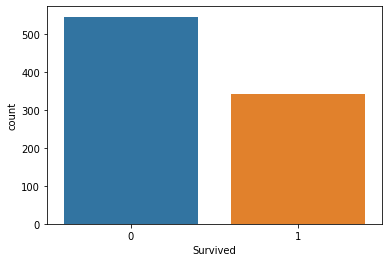

In [4]:
# It will give a count that which passangers are servived and which are not(1 - Survived and 0- Not Survived)
sns.countplot(x = "Survived", data=titanic_data)

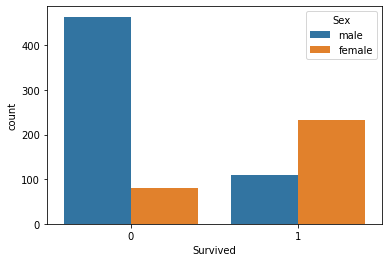

In [5]:
sns.countplot( x= "Survived", hue = "Sex", data=titanic_data )

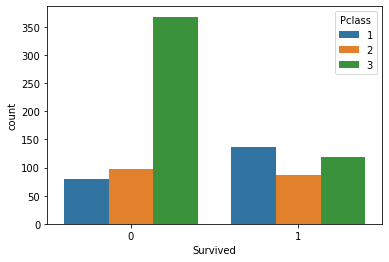

In [6]:
# It will show that how many passanger of different class passanger are servived.
sns.countplot( x="Survived", hue="Pclass", data=titanic_data)

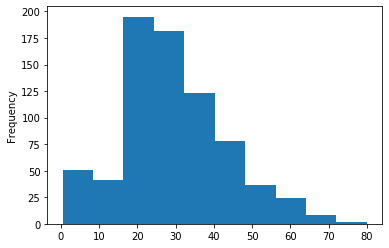

In [7]:
#These Shows how many passangers on given age range
titanic_data["Age"].plot.hist()

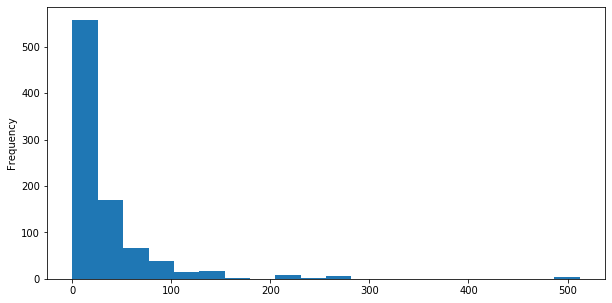

In [8]:
titanic_data["Fare"].plot.hist(bins = 20, figsize=(10,5))

In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 11 columns):
Passanger_Id               887 non-null int64
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        741 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
Cabin                      627 non-null object
Embarked                   865 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.4+ KB


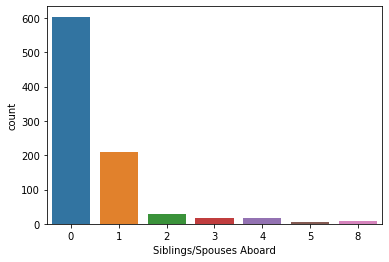

In [10]:
sns.countplot(x="Siblings/Spouses Aboard", data=titanic_data)

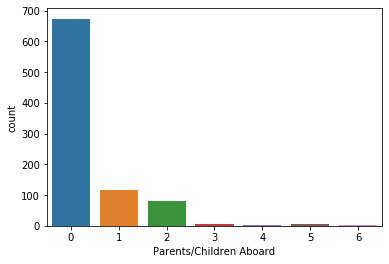

In [11]:
sns.countplot( x="Parents/Children Aboard", data=titanic_data)

## Data Wrangling(Cleaning)

In [12]:
titanic_data.isnull()

,Passanger_Id,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
882,False,False,False,False,False,False,False,False,False,True,False
883,False,False,False,False,False,False,False,False,False,True,False
884,False,False,False,False,False,False,False,False,False,True,False
885,False,False,False,False,False,False,False,False,False,True,False


In [13]:
titanic_data.isnull().sum()

Passanger_Id                 0
Survived                     0
Pclass                       0
Name                         0
Sex                          0
Age                        146
Siblings/Spouses Aboard      0
Parents/Children Aboard      0
Fare                         0
Cabin                      260
Embarked                    22
dtype: int64

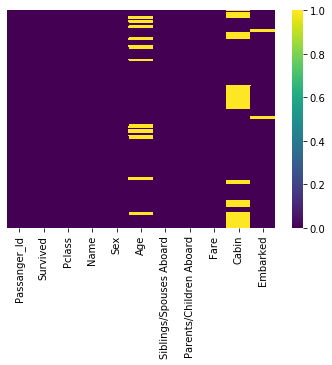

In [14]:
#This command will give where is null values in each column as marked yellow cell.
sns.heatmap(titanic_data.isnull(), yticklabels=False , cmap="viridis")

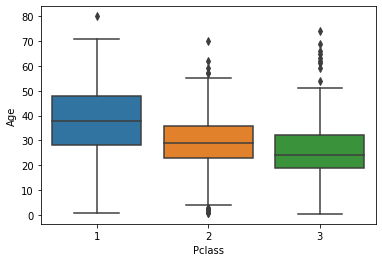

In [15]:
#This boxplot will shows the class of passanger as per their ages
sns.boxplot(x="Pclass", y ="Age", data=titanic_data)

In [16]:
titanic_data.head(5)

,Passanger_Id,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Cabin,Embarked
0,1,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,C85,C
2,3,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,C123,S
4,5,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,NaN,S


In [17]:
#For data cleaning we can drop rows as well as column and also gives some dummy values
titanic_data.drop("Cabin", axis=1, inplace=True)

In [18]:
titanic_data.head(5)

,Passanger_Id,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Embarked
0,1,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,S
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,C
2,3,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,S
3,4,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,S
4,5,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,S


In [19]:
titanic_data.dropna(inplace = True)

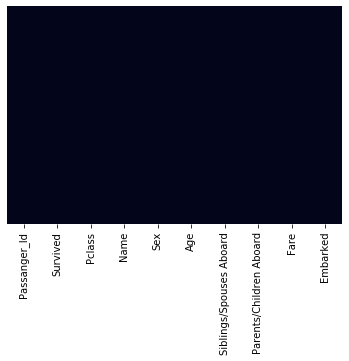

In [20]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [21]:
titanic_data.isnull().sum()

Passanger_Id               0
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
Embarked                   0
dtype: int64

In [22]:
#Convert Categorical Data to Logical Data
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True) # We required only one column so we have skiped first column
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [23]:
#Here both columns are zero then first column is true
embark = pd.get_dummies(titanic_data['Embarked'], drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
882,1,0
883,1,0
884,1,0
885,1,0


In [24]:
#Here both columns are zero then first column is true
pclass = pd.get_dummies(titanic_data['Pclass'], drop_first=True)
pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
882,1,0
883,0,0
884,0,1
885,0,0


In [25]:
titanic_data = pd.concat([titanic_data,sex,embark,pclass], axis=1)
titanic_data

,Passanger_Id,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Embarked,male,Q,S,2,3
0,1,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,S,1,0,1,0,1
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,3,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,S,0,0,1,0,1
3,4,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,S,0,0,1,0,0
4,5,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,S,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,Q,1,1,0,1,0
883,884,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,Q,0,1,0,0,0
884,885,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,Q,0,1,0,0,1
885,886,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,Q,1,1,0,0,0


In [26]:
titanic_data.drop(['Sex','Embarked','Passanger_Id','Name'], axis=1, inplace=True)

In [27]:
titanic_data.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [28]:
titanic_data.drop(['Pclass'], axis=1, inplace=True)

In [29]:
titanic_data.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


### Train Data

In [30]:
X = titanic_data.drop("Survived", axis=1)
y = titanic_data["Survived"]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [33]:
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel = LogisticRegression()

In [37]:
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
prediction = logmodel.predict(X_test)

In [39]:
from sklearn.metrics import classification_report


In [41]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.77      0.85      0.81       129\n           1       0.74      0.62      0.68        87\n\n    accuracy                           0.76       216\n   macro avg       0.75      0.74      0.74       216\nweighted avg       0.76      0.76      0.75       216\n'

In [42]:
from sklearn.metrics import confusion_matrix


In [43]:
confusion_matrix(y_test,prediction)

array([[110,  19],
       [ 33,  54]], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)# It gives an accuracy=78 percentage

0.7592592592592593